In [2]:
import pandas as pd
df_raw = pd.read_csv('./data/city_day.csv')
df_raw = df_raw.loc[df_raw['City'] == 'Delhi',:]
df_raw.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [3]:
df_raw['AQI_Bucket'].unique()

array(['Severe', 'Moderate', 'Very Poor', 'Poor', 'Satisfactory', nan,
       'Good'], dtype=object)

In [6]:
# AQI 상태 분류 기준 찾기
print('Severe' ,df_raw.loc[df_raw['AQI_Bucket'] == 'Severe', 'AQI'].min())
print('Very Poor' ,df_raw.loc[df_raw['AQI_Bucket'] == 'Very Poor', 'AQI'].min())
print('Poor' ,df_raw.loc[df_raw['AQI_Bucket'] == 'Poor', 'AQI'].min())
print('Moderate' ,df_raw.loc[df_raw['AQI_Bucket'] == 'Moderate', 'AQI'].min())
print('Satisfactory' ,df_raw.loc[df_raw['AQI_Bucket'] == 'Satisfactory', 'AQI'].min())
print('Good' ,df_raw.loc[df_raw['AQI_Bucket'] == 'Good', 'AQI'].min())

Severe 401.0
Very Poor 301.0
Poor 201.0
Moderate 101.0
Satisfactory 51.0
Good 29.0


In [7]:
df = df_raw.loc[:, ['Date', 'AQI']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2009 non-null   object 
 1   AQI     1999 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.1+ KB


In [22]:
# AQI null 확인
df['AQI'].isna().sum()

10

In [13]:
# Date 변수 date 타입으로 변경
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2009 non-null   datetime64[ns]
 1   AQI     1999 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.1 KB


In [14]:
# 날짜 중복 체크
df['Date'].is_unique

True

In [15]:
# 날짜 기간 확인
print(df['Date'].min())
print(df['Date'].max())

2015-01-01 00:00:00
2020-07-01 00:00:00


In [21]:
# 날짜 null 없는지 확인
df['Date'].max() - df['Date'].min()

Timedelta('2008 days 00:00:00')

In [23]:
# 날짜 null 없는지 확인
df['year'] = df['Date'].dt.year
df['year'].value_counts()

2016    366
2015    365
2017    365
2018    365
2019    365
2020    183
Name: year, dtype: int64

In [51]:
# info 에서 확인한 AQI null 값 보정  // 5일 이동평균( t ← mean(t -1 ~ t-5) )
df_fillna = df.fillna(df.shift(1).rolling(window = 5, min_periods = 1).mean())
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2009 non-null   datetime64[ns]
 1   AQI     2009 non-null   float64       
 2   year    2009 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 62.8 KB


In [52]:
# Date 값을 인덱스로 변환
df_ts = df_fillna.set_index('Date')
df_ts.head(3)

,AQI,year
Date,,
2015-01-01,472.0,2015
2015-01-02,454.0,2015
2015-01-03,143.0,2015


In [ ]:
Severe 401.0
Very Poor 301.0
Poor 201.0
Moderate 101.0
Satisfactory 51.0
Good 29.0

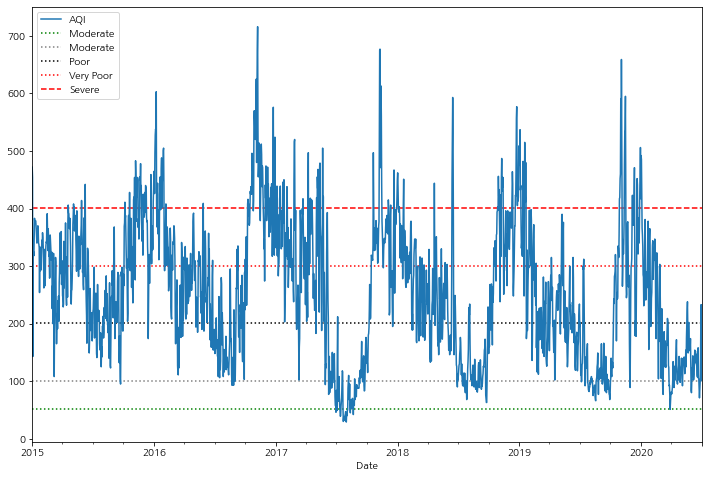

In [102]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.hlines(51, np.min(df_ts.index), np.max(df_ts.index),color = 'green', label = 'Moderate', linestyle = ':')
plt.hlines(101, np.min(df_ts.index), np.max(df_ts.index),color = 'gray', label = 'Moderate', linestyle = ':')
plt.hlines(201, np.min(df_ts.index), np.max(df_ts.index),color = 'black', label = 'Poor', linestyle = ':')
plt.hlines(301, np.min(df_ts.index), np.max(df_ts.index),color = 'red', label = 'Very Poor', linestyle = ':')
plt.hlines(401, np.min(df_ts.index), np.max(df_ts.index),color = 'red', label = 'Severe', linestyle = '--')

df_ts['AQI'].plot()
plt.legend()
plt.show()

In [57]:
# 예측용 데이터셋 제작
df_train = df_ts.loc[df_ts['year'] < 2019, :]
df_test = df_ts.loc[df_ts['year'] >= 2019, :]

df_train.drop(['year'], axis = 1, inplace = True)
df_test.drop(['year'], axis = 1, inplace = True)

C:\Users\chaeyoung\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


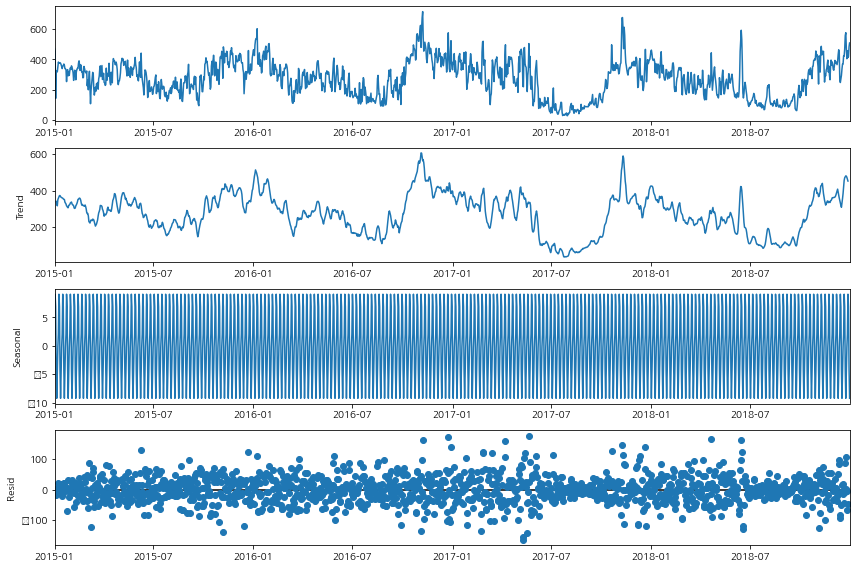

In [58]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df_train
result = seasonal_decompose(ts, model = 'additive')

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

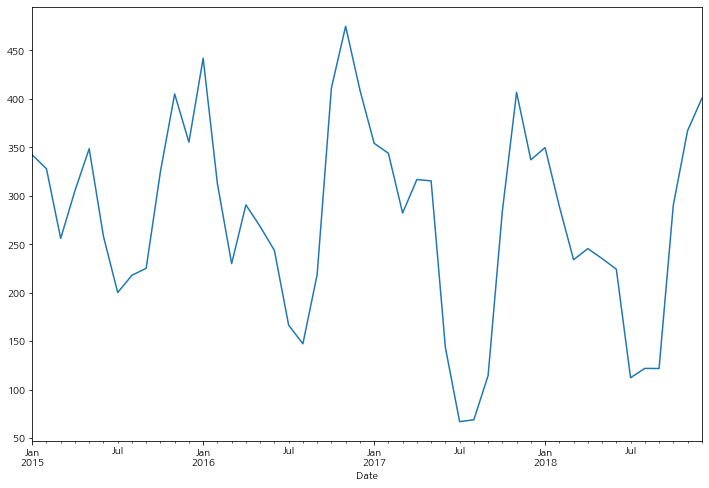

In [59]:
# 변동성이 커서 월 또는 주 단위로 평균을 내어 리샘플링 필요
df_train_m_avg = df_train['AQI'].resample('MS').mean()
df_train_m_avg.plot()
plt.show()

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


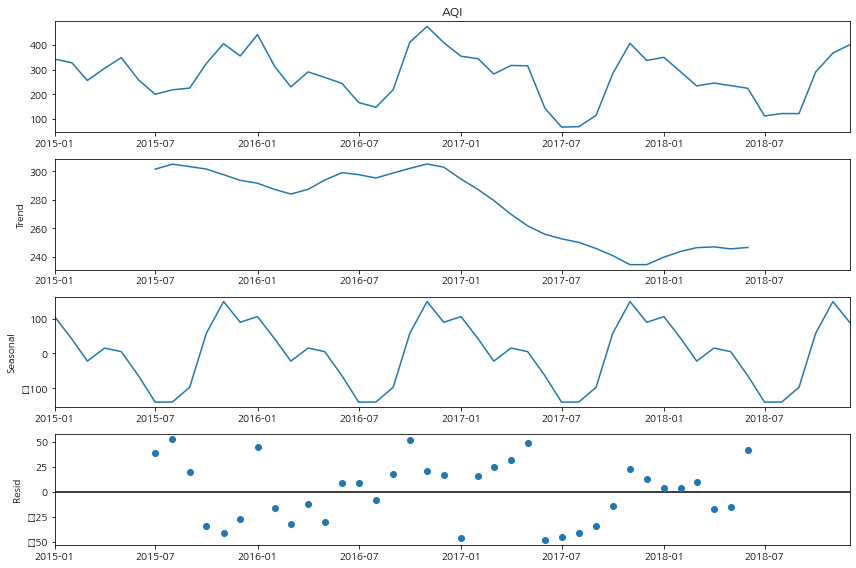

In [60]:
#시계열 분해

ts = df_train_m_avg
result = seasonal_decompose(ts, model = 'additive')

plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

In [ ]:
#감소하는 추세, 12개월 단위로 계절성 확인 가능

In [61]:
# 정상성 검정
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_train_m_avg, autolag = 'AIC')
adf

(-0.9956699237686186,
 0.7548403188414492,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 412.1770340798317)

<AxesSubplot:xlabel='Date'>

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


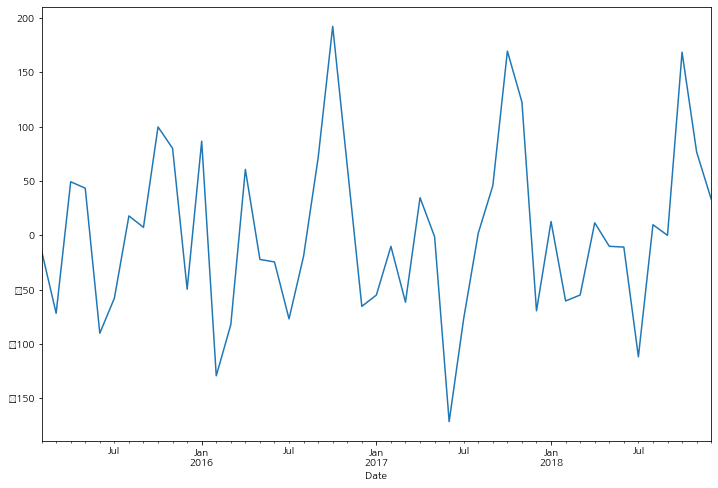

In [62]:
#차분 (추세 삭제)
df_train_m_avg_d_t = df_train_m_avg.diff(1)
df_train_m_avg_d_t = df_train_m_avg_d_t.dropna()

df_train_m_avg_d_t.plot()

In [63]:
# 정상성 검정 (추세 삭제 확인)
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_train_m_avg_d_t, autolag = 'AIC')
adf

(-4.874394500545086,
 3.910555477252427e-05,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 401.50921201239976)

<AxesSubplot:xlabel='Date'>

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


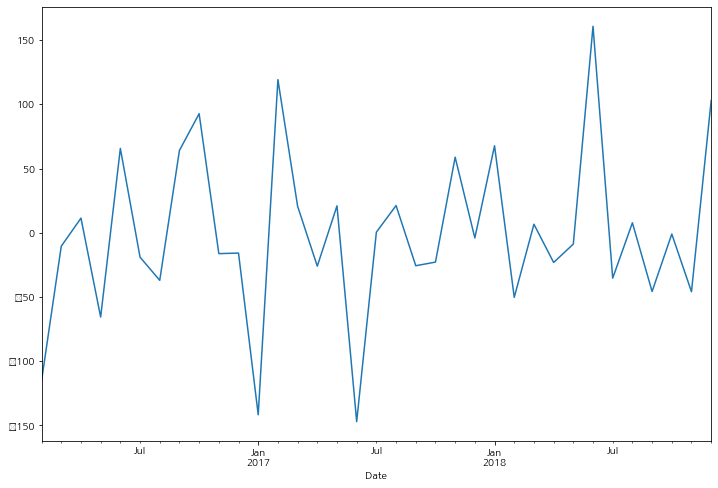

In [64]:
#차분 (계절성 삭제)
df_train_m_avg_d_ts = df_train_m_avg_d_t.diff(12)
df_train_m_avg_d_ts = df_train_m_avg_d_ts.dropna()

df_train_m_avg_d_ts.plot()

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


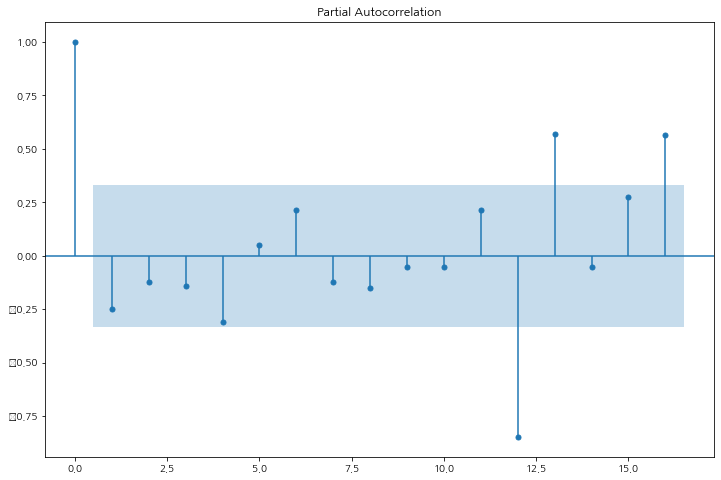

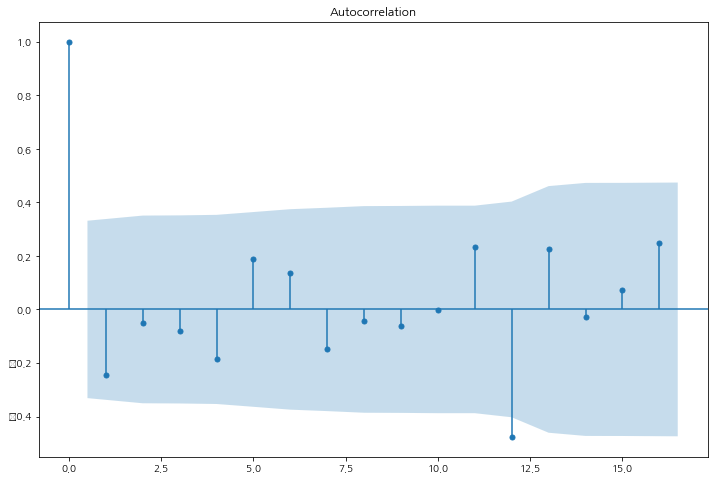

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df_train_m_avg_d_ts)  # AR = 0, 1

plot_acf(df_train_m_avg_d_ts) # MA = 0, 1

plt.show()

In [69]:
#SARIMA : 계절성 반영
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_train_m_avg.values,
                order = (0,1,0), seasonal_order = (1,1,1,12),
               #trend = 'n',
               #enforce_stationarity = False,
               enforce_invertibility = False)

results = model.fit()
results.summary()

C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -185.334
Date:                              Sat, 19 Nov 2022   AIC                            376.668
Time:                                      20:26:10   BIC                            381.334
Sample:                                           0   HQIC                           378.278
                                               - 48                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5010      0.208     -2.408      0.016      -0.909      -0.093
ma.S.L12      -1.0002      0.324     -3.086      0.002      -1.635      -0.365
sigma2      1065.6048      0.000    3.5e+06      0.000    1065.604    1065.605
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.98   Prob(JB):                         0.95
Heteroskedasticity (H):               0.92   Skew:                            -0.13
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.81e+23. Standard errors may be unstable.
"""

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


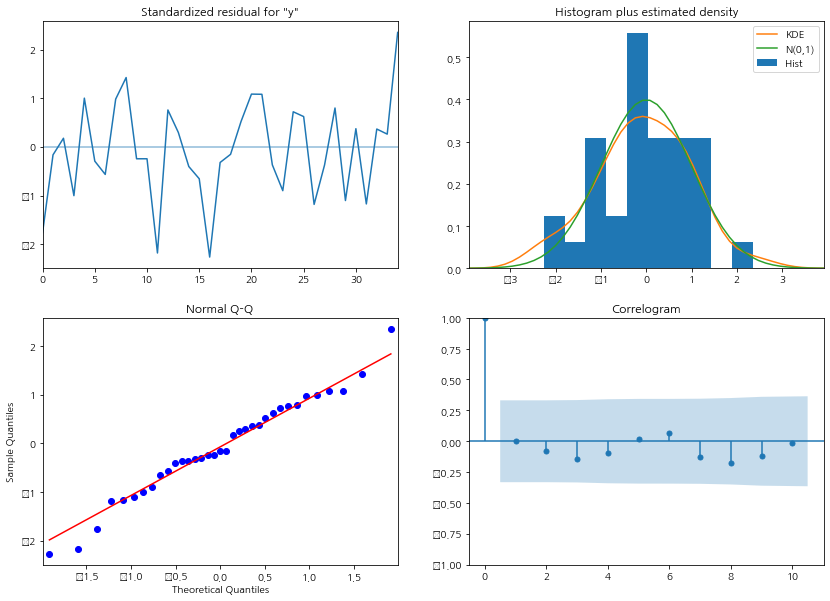

In [70]:
results.plot_diagnostics(figsize = (14,10))
plt.show()

In [71]:
forecast_values = results.get_forecast(steps = len(df_test))

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


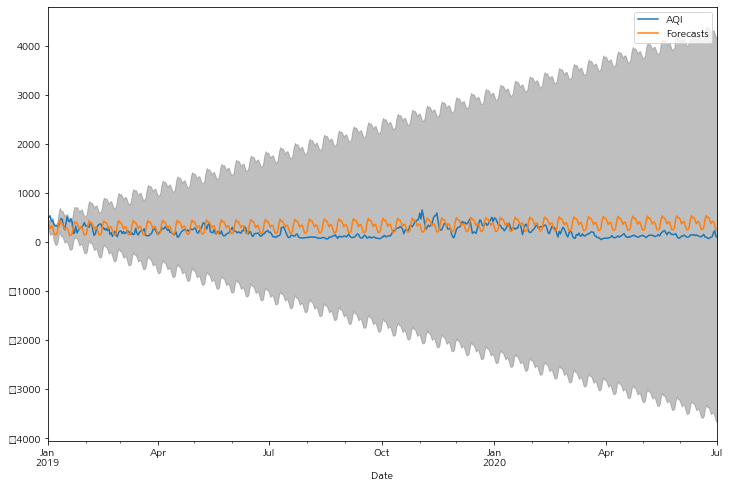

In [72]:
ax = df_test.plot()

pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(df_test.index)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'gray', alpha = 0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = list(df_test.index)
predicted.columns = ['Forecasts']
predicted.plot(ax = ax, label = 'Forcasts')

plt.legend()
plt.show()

In [77]:
import itertools
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(
                        df_train_m_avg.values,
                        order = param, seasonal_order = param_seasonal,
                       #trend = 'n',
                       enforce_stationarity = False,
                       enforce_invertibility = False
                        )
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:668.728173781499
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1732.280520354433
ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:309.25331109221077
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:391.64156920267277
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:258.002038349178


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:120.24207762035337
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:403.0229980253359
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1537.2534531947445
ARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:251.28303249665885
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:268.77320165884674
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:259.06050594635735
ARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:122.1615998393259
ARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:260.31098314230354
ARIMA(0, 0, 0)x(2, 0, 1, 12) - AIC:260.9287985750467


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:253.0316506785391
ARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:130.0369503220013
ARIMA(0, 0, 0)x(2, 1, 1, 12) - AIC:131.27557016613355
ARIMA(0, 0, 0)x(2, 1, 2, 12) - AIC:123.02712339198784
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:602.5269452077687
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2631.010796734464


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:279.6728910717047
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:375.87425566235305
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:239.0475368863241
ARIMA(0, 0, 1)x(0, 1, 2, 12) - AIC:110.97833226135154
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:398.97427673888546
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2545.042668065325


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:239.68011140545659
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:258.2282115416142
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:240.16380914592523
ARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:112.90412275653432
ARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:253.30302276142885
ARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:254.87292485592843


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 0, 2, 12) - AIC:237.89133296394397
ARIMA(0, 0, 1)x(2, 1, 0, 12) - AIC:130.61239193962783
ARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:131.7637017143775


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:114.8723805268148
ARIMA(0, 0, 2)x(0, 0, 0, 12) - AIC:579.3896016703553
ARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:2497.3540180010186
ARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:258.80458813791154
ARIMA(0, 0, 2)x(0, 1, 0, 12) - AIC:365.14870628823564
ARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:226.675309906214
ARIMA(0, 0, 2)x(0, 1, 2, 12) - AIC:101.60260555473043
ARIMA(0, 0, 2)x(1, 0, 0, 12) - AIC:398.9133174211825


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:2461.7271733993775


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:233.00927855968493
ARIMA(0, 0, 2)x(1, 1, 0, 12) - AIC:252.8780637848251
ARIMA(0, 0, 2)x(1, 1, 1, 12) - AIC:225.47660557898266
ARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:102.72344200773883
ARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:250.06406399139098
ARIMA(0, 0, 2)x(2, 0, 1, 12) - AIC:251.30955029104248


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 2, 12) - AIC:224.139172516481
ARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:129.5403862499391
ARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:129.14774405327609


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:104.79419417376192
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:533.7235231874419
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1324.7497492639773
ARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:254.81952987973042
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:380.49527617649517
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:231.3589378843083
ARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:111.14487897829085
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:390.2356870546143
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1358.4435178494082
ARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:238.4097488880508


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:241.64538334933914
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:231.6574208479228
ARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:110.93364693820335
ARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:243.15925490202375
ARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:243.7514169164554
ARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:235.25763943751846
ARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:117.97614101849062
ARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:119.96692539571043
ARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:112.68972600145412
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:520.421897583114
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2110.7373009631256


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:245.73145865730743
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:367.95869968098
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:223.47960571783116
ARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:99.54207437322002
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:391.5735698863832
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1934.1907717385252


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:231.0730987884963
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:243.48606969474574
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:224.116893973717
ARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:99.2173668703081
ARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:244.85594724597203
ARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:245.29803743028324
ARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:227.1904145852745
ARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:116.80521187586059
ARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:118.54569732099412
ARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:100.2117198875218
ARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:510.89268554358745
ARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:2213.217756678985


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:237.37832123846005
ARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:358.73987027999516
ARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:215.76844616822805
ARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:92.44404156610855
ARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:392.57986559637004
ARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:957.9388350947515
ARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:222.55013941028113
ARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:245.2500033092953
ARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:216.24618214220325


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:92.34826872421588
ARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:246.79400322954146


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:247.09487419097505
ARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:221.4485288639691
ARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:116.7048154686251
ARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:121.40616373824975


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:91.38648796509955
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:545.6984208650765
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1399.149466164971
ARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:266.9304672040312
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:384.54815807445124
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:241.76932210047667


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:119.75627874993037
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:382.83914800553305


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1430.6925368962368
ARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:248.39447192980748
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:240.94131176376195
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:242.02146039519252
ARIMA(1, 0, 0)x(1, 1, 2, 12) - AIC:121.24352144750196
ARIMA(1, 0, 0)x(2, 0, 0, 12) - AIC:241.18840440957936
ARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:242.35490886086166
ARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:244.35324299022778
ARIMA(1, 0, 0)x(2, 1, 0, 12) - AIC:118.77460589961646
ARIMA(1, 0, 0)x(2, 1, 1, 12) - AIC:120.41274891830834
ARIMA(1, 0, 0)x(2, 1, 2, 12) - AIC:123.19129317956464
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:532.7002829477173
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2435.931048168172


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:258.19808670993217
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:375.27173432616775
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:232.81478272103067
ARIMA(1, 0, 1)x(0, 1, 2, 12) - AIC:112.53059557868414
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:384.73024288272694


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2238.8224859966904
ARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:238.65129401682597
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:242.15758608425588
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:232.87993533851986
ARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:111.31694777223974
ARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:241.92530268021
ARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:243.0805788890224
ARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:234.81574918581023
ARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:119.03604675324866


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:119.1967518362235


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:112.35849073938226
ARIMA(1, 0, 2)x(0, 0, 0, 12) - AIC:523.2813584088066
ARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:1012.171940942812
ARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:249.44427644823608
ARIMA(1, 0, 2)x(0, 1, 0, 12) - AIC:366.7107994425278
ARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:224.45215720272327
ARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:103.5133634831088
ARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:385.3479840211565


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:1971.712139771294
ARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:230.18402175129978
ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:243.70275158607652
ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:225.20880028543738
ARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:103.22691811970583
ARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:242.50526505723911
ARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:246.56066378893223


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:225.28113911265294


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:121.0011995197707


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:120.85320969480972


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:105.58039813854238
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:532.7446591976432
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1285.7957545073702
ARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:256.74545434082074
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:380.0118820417195
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:233.07218512464826
ARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:112.66881066019401
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:377.7078490783549
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1270.9722470428194


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:239.9120602721017
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:233.37321126236344
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:233.54313892492684
ARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:112.89735858751587
ARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:234.96004336647914
ARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:234.70231603811908
ARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:236.70332931082538
ARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:109.84090431295895
ARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:112.77302186156865
ARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:114.57730864291187
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:521.3333955364205
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2242.795519562076


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:247.7099532899985
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:367.31450257806097
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:222.94256004723732
ARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:101.47448689026665
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:376.94351057895085


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1651.7275612233843


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:232.75950322909466
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:232.7253023616327
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:223.74315970508252
ARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:101.2238567060617
ARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:236.587493394079
ARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:236.81088345963965


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:230.1648770312306
ARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:109.07681817338396
ARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:111.56169513105793


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:102.06456407797714
ARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:505.2665332691344
ARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1807.1107239604546
ARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:236.1939249193762
ARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:358.99004101897765
ARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:216.14987417668937
ARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:94.21853154792703
ARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:378.1701228450169


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1620.6551901502444
ARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:224.5199214079408
ARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:233.8123020200013
ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:215.71584401342156


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:94.07346567526903
ARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:238.87328696507282
ARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:238.22499080021544
ARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:220.12159847590573
ARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:108.88519219293933


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:112.72021285682158


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:95.38804302290191
ARIMA(2, 0, 0)x(0, 0, 0, 12) - AIC:533.6568357749005
ARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1641.2003444572297
ARIMA(2, 0, 0)x(0, 0, 2, 12) - AIC:268.7539957922009
ARIMA(2, 0, 0)x(0, 1, 0, 12) - AIC:375.2612523128057
ARIMA(2, 0, 0)x(0, 1, 1, 12) - AIC:243.6976678650841
ARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:121.74981504739046
ARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:374.29642894746917


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:1633.9054793077153
ARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:250.09246030400104
ARIMA(2, 0, 0)x(1, 1, 0, 12) - AIC:231.98045591211414
ARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC:232.62521660451574
ARIMA(2, 0, 0)x(1, 1, 2, 12) - AIC:123.10654301287931
ARIMA(2, 0, 0)x(2, 0, 0, 12) - AIC:229.58424136865392
ARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:229.91708897029022
ARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:231.91717664183955
ARIMA(2, 0, 0)x(2, 1, 0, 12) - AIC:111.0490599418183
ARIMA(2, 0, 0)x(2, 1, 1, 12) - AIC:112.9666013974381


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 1, 2, 12) - AIC:114.89575469969546
ARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:534.5089628622568
ARIMA(2, 0, 1)x(0, 0, 1, 12) - AIC:2522.6434263671426


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:260.1783559232963
ARIMA(2, 0, 1)x(0, 1, 0, 12) - AIC:377.24247307257855
ARIMA(2, 0, 1)x(0, 1, 1, 12) - AIC:232.9725420609841


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:114.52741197926193
ARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:376.28734794019726


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:2229.4622884023697
ARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:239.6034056644125
ARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:233.95373660111468
ARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:234.70927920449105
ARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:115.35156072653376


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 0, 12) - AIC:226.05011288276356


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:224.2573670229927


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:225.53206347507614
ARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:111.11816172757683


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:112.55749227300518


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:117.30888810993534
ARIMA(2, 0, 2)x(0, 0, 0, 12) - AIC:519.2046249672196


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 1, 12) - AIC:378.035516357059


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 2, 12) - AIC:249.34789563684967


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC:365.7407968024214
ARIMA(2, 0, 2)x(0, 1, 1, 12) - AIC:226.39691231132932
ARIMA(2, 0, 2)x(0, 1, 2, 12) - AIC:105.51275823607219
ARIMA(2, 0, 2)x(1, 0, 0, 12) - AIC:377.4948253162516


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:1944.8867625078772


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:232.0330555895325
ARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC:235.70486026459344
ARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:227.1693070377631


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:106.58445077051819


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 0, 12) - AIC:231.36587408718015


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:236.95627186781496


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:218.60022003362513


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 0, 12) - AIC:111.45169351639645


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:118.13858897246615


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:109.09990240749494
ARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:521.685240015264


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1594.5780559003817
ARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:258.7259698645088
ARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:370.8596564490981
ARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:234.95856489558028
ARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:114.00459903957096
ARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:368.98954980826227


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1260.1245408386617
ARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:241.87547288922744
ARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:225.76019954652145
ARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:225.92940142458616
ARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:114.22143594086977
ARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:227.57350074678484
ARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:227.04350375856856
ARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:229.04347421772877
ARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:102.21186975396311
ARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:104.47487333176943


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:106.3693917543664
ARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:514.3775857898543
ARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1897.5885981229621
ARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:246.41620397402164
ARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:369.08373944256147
ARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:226.98844264542635
ARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:102.96580860689687
ARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:368.0065174895516
ARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:2216.3419916756907


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:234.70940106476834
ARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:223.52617152338016
ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:224.2198541534276
ARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:103.15793132369912
ARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:229.5378608404218
ARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:229.0252422894545
ARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:231.02519680565152
ARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:101.34282844787205


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:102.32219090516158


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:103.87868236700771
ARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:501.87776010248905


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1837.4578858407726
ARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:232.03160756367373
ARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:360.9683174324036
ARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:217.37825382729372


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:91.79704507971962
ARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:370.0448416976726


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1821.6948635887093


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:222.63812737580557
ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:221.58659874435665


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:210.54975998181803


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:95.92348063847153
ARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:222.81415193896464
ARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:228.48904683311272


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:212.1896870448017


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:102.11599726640902


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:104.21214356632102
ARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:99.84672540613568


C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
#SARIMA : 계절성 반영
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(df_train_m_avg.values,
                order = (0,1,1), seasonal_order = (2,1,0,12),
               #trend = 'n',
               enforce_stationarity = False,
               enforce_invertibility = False)

results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                 -54.403
Date:                             Sat, 19 Nov 2022   AIC                            116.805
Time:                                     20:33:38   BIC                            118.397
Sample:                                          0   HQIC                           115.802
                                              - 48                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.602     -1.661      0.097      -2.180       0.180
ar.S.L12      -0.7795      0.184     -4.235      0.000      -1.140      -0.419
ar.S.L24      -0.3093      0.240     -1.288      0.198      -0.780       0.162
sigma2       934.9860      0.001   1.45e+06      0.000     934.985     934.987
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.56   Prob(JB):                         0.52
Heteroskedasticity (H):               4.41   Skew:                             0.83
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.85e+22. Standard errors may be unstable.
"""

In [81]:
# ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:91.38648796509955

#SARIMA : 계절성 반영
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_train_m_avg.values,
                order = (0,1,2), seasonal_order = (2,1,2,12),
               #trend = 'n',
               enforce_stationarity = False,
               enforce_invertibility = False)

results = model.fit()
results.summary()

C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\chaeyoung\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                 -38.693
Date:                            Sat, 19 Nov 2022   AIC                             91.386
Time:                                    20:33:39   BIC                             91.943
Sample:                                         0   HQIC                            87.636
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9492    448.347     -0.004      0.997    -880.693     876.795
ma.L2          1.0013    463.058      0.002      0.998    -906.575     908.578
ar.S.L12      -0.5608      0.290     -1.935      0.053      -1.129       0.007
ar.S.L24      -0.0306      0.087     -0.350      0.726      -0.201       0.140
ma.S.L12      -1.3874    395.908     -0.004      0.997    -777.353     774.578
ma.S.L24       1.1448    365.043      0.003      0.997    -714.327     716.616
sigma2       322.4138      1.241    259.809      0.000     319.982     324.846
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.30   Prob(JB):                         0.65
Heteroskedasticity (H):               2.11   Skew:                            -0.67
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.11e+21. Standard errors may be unstable.
"""

In [84]:
forecast_values = results.get_forecast(steps = len(df_test))
forecast_values1 = results1.get_forecast(steps = len(df_test))

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


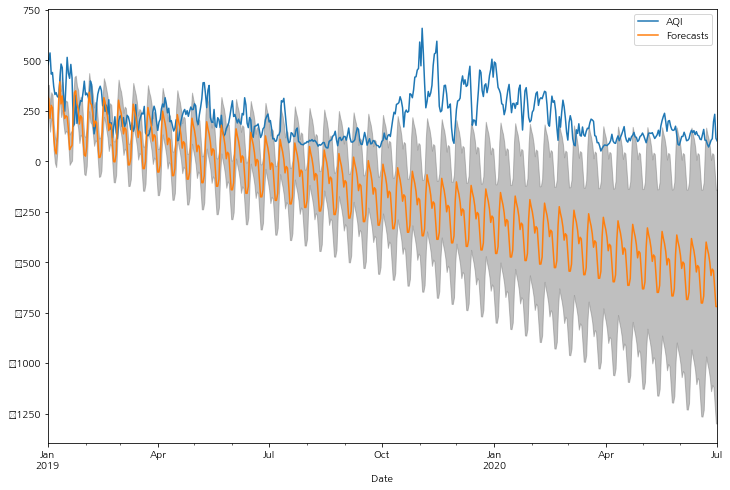

In [85]:
ax = df_test.plot()

pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(df_test.index)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'gray', alpha = 0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = list(df_test.index)
predicted.columns = ['Forecasts']
predicted.plot(ax = ax, label = 'Forcasts')

plt.legend()
plt.show()

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


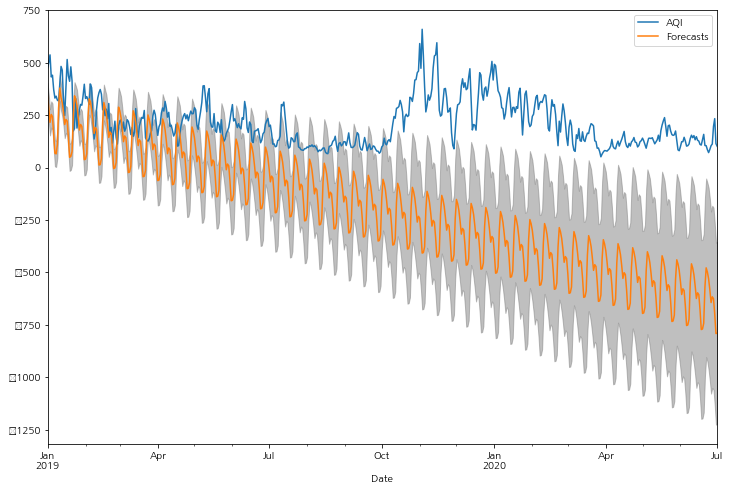

In [86]:
ax = df_test.plot()

pred_ci = pd.DataFrame(forecast_values1.conf_int())
pred_ci.index = list(df_test.index)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'gray', alpha = 0.5)

predicted = pd.DataFrame(forecast_values1.predicted_mean)
predicted.index = list(df_test.index)
predicted.columns = ['Forecasts']
predicted.plot(ax = ax, label = 'Forcasts')

plt.legend()
plt.show()

In [87]:
df_test_m_avg = df_test['AQI'].resample('MS').mean()

In [93]:
forecast_values = results.get_forecast(steps = len(df_test_m_avg))
forecast_values1 = results1.get_forecast(steps = len(df_test_m_avg))

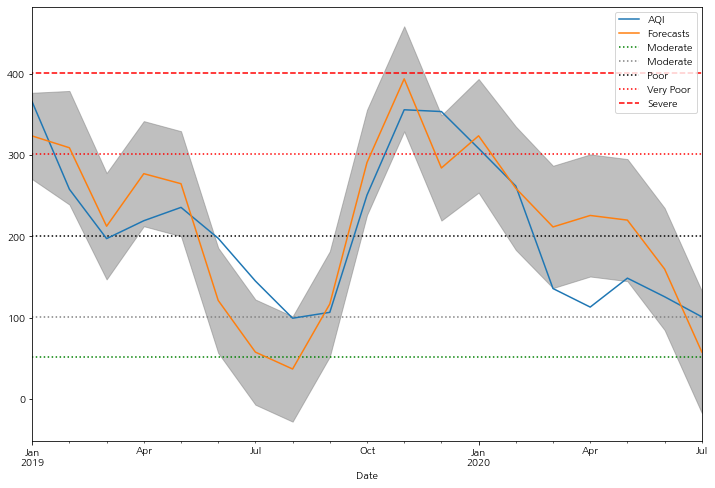

In [103]:
ax = df_test_m_avg.plot()

pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(df_test_m_avg.index)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'gray', alpha = 0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = list(df_test_m_avg.index)
predicted.columns = ['Forecasts']
predicted.plot(ax = ax, label = 'Forcasts')

plt.hlines(51, np.min(df_ts.index), np.max(df_ts.index),color = 'green', label = 'Moderate', linestyle = ':')
plt.hlines(101, np.min(df_ts.index), np.max(df_ts.index),color = 'gray', label = 'Moderate', linestyle = ':')
plt.hlines(201, np.min(df_ts.index), np.max(df_ts.index),color = 'black', label = 'Poor', linestyle = ':')
plt.hlines(301, np.min(df_ts.index), np.max(df_ts.index),color = 'red', label = 'Very Poor', linestyle = ':')
plt.hlines(401, np.min(df_ts.index), np.max(df_ts.index),color = 'red', label = 'Severe', linestyle = '--')


plt.legend()
plt.show()

In [95]:
from sklearn.metrics import r2_score
r2_score(predicted, df_test_m_avg)

0.6719243429375853

In [99]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import math

rmse = np.sqrt(mean_squared_error(df_test_m_avg, predicted))
rmse

56.7430653674423

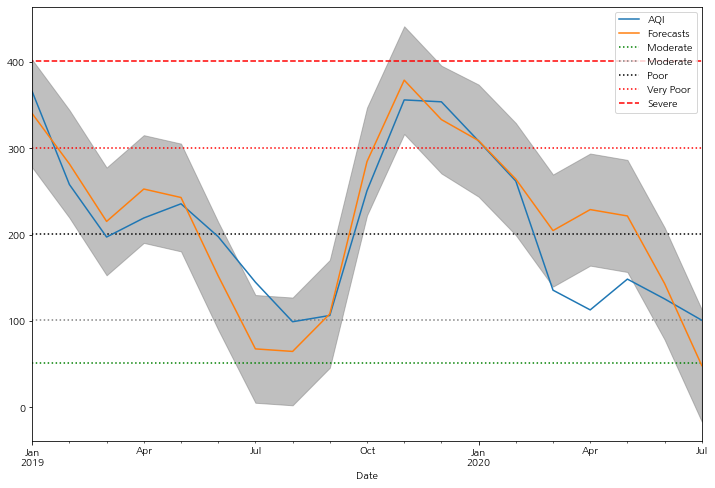

In [104]:
ax = df_test_m_avg.plot()

pred_ci = pd.DataFrame(forecast_values1.conf_int())
pred_ci.index = list(df_test_m_avg.index)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'gray', alpha = 0.5)

predicted1 = pd.DataFrame(forecast_values1.predicted_mean)
predicted1.index = list(df_test_m_avg.index)
predicted1.columns = ['Forecasts']
predicted1.plot(ax = ax, label = 'Forcasts')

plt.hlines(51, np.min(df_ts.index), np.max(df_ts.index),color = 'green', label = 'Moderate', linestyle = ':')
plt.hlines(101, np.min(df_ts.index), np.max(df_ts.index),color = 'gray', label = 'Moderate', linestyle = ':')
plt.hlines(201, np.min(df_ts.index), np.max(df_ts.index),color = 'black', label = 'Poor', linestyle = ':')
plt.hlines(301, np.min(df_ts.index), np.max(df_ts.index),color = 'red', label = 'Very Poor', linestyle = ':')
plt.hlines(401, np.min(df_ts.index), np.max(df_ts.index),color = 'red', label = 'Severe', linestyle = '--')


plt.legend()
plt.show()

In [98]:
from sklearn.metrics import r2_score
r2_score(predicted1, df_test_m_avg)

0.763343943564676

In [100]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import math

rmse = np.sqrt(mean_squared_error(df_test_m_avg, predicted1))
rmse

46.271446192169684